In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, minmax_scale
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sys 
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.utils import np_utils
import tensorflow as tf
#from keras.regularizers import L1L2
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.utils import shuffle
#from keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from featurewiz import featurewiz
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.feature_selection import mutual_info_classif
from scipy import stats
np.random.seed(19680801)

Imported version = 0.1.70.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


pct_is_new                   0.209180
n_secbiggest_anc             0.062980
pct_of_secbiggest_anc_new    0.000000
pct_top_5_anc                0.004535
wrcr                         0.000000
rcr_mid                      0.104945
rcr_hi                       0.058156
human                        0.108255
animal                       0.057436
molecular_cellular           0.037462
is_clinical                  0.101834
is_research_article          0.108444
cited_by_clin                0.088559
rage                         0.082661
dtype: float64


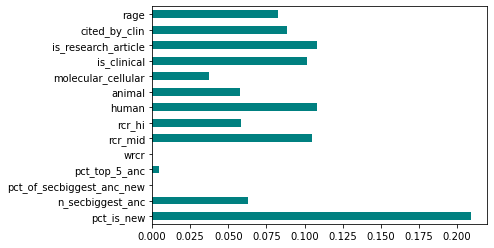

[2.0804564] [[ 7.32260684 -0.1162731  -1.85858488  1.66168088 -2.045108   -0.55387303
   0.46812718  0.59342134  1.18439021  1.71868961  1.48899578 -4.78175183
   2.82159164 -0.43152253]] 0.8075313807531381
cross validated f1 score  0.7940975690975691


In [2]:
###so far, this is the best model of dccites

x_train = pd.read_csv("data_84.csv")
y_train = x_train['class']
'''x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc','pct_of_secbiggest_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish','n_secbiggest_anc'
                            ], axis = 1)'''

x_train[['wrcr','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc']] = minmax_scale(x_train[['wrcr','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc']])
x_train = x_train.drop(['cluster','year','n','pct_is_newish','pct_dusted_ccn','pct_dusted_rmcl','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)#$%
x_train = x_train.drop(['n_biggest_anc','nih','n_clusts_90_anc','pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low','class'], axis = 1)



importance = mutual_info_classif(x_train,y_train)
feat_imp = pd.Series(importance,x_train.columns[0:len(x_train.columns)])
print(feat_imp)
feat_imp.plot(kind = 'barh',color = 'teal')
plt.show()

#x_train =  StandardScaler().fit_transform(x_train) 



y_train = np.array(y_train)
model = LogisticRegression(random_state=0, C = 10).fit(x_train,y_train) ##logistioc
    
print(model.intercept_, model.coef_, model.score(x_train, y_train))
scores = cross_val_score(model, x_train, y_train, cv=20,scoring = "f1")
print("cross validated f1 score ",scores.mean())

actual len  5202
len of xtest  424
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1978
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7853313353313354
(424,)
no of positive  175
len of predy  97


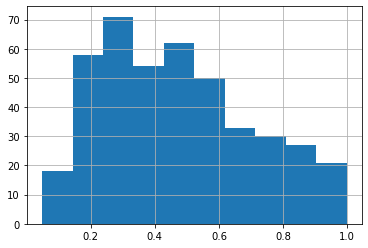

$$$  424   97
total positive  97
tp tn fp fn 0   0   0   0
year  1978 positive  0
actual len  5442
len of xtest  441
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  234
year   1979
[1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7793198468198468
(441,)
no of positive  161
len of predy  87


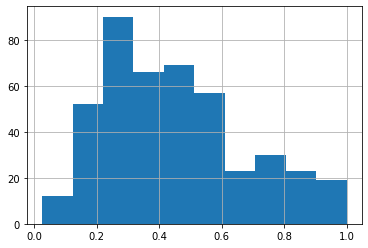

$$$  441   87
total positive  87
tp tn fp fn 0   1   0   0
year  1979 positive  0
actual len  5711
len of xtest  470
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1980
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7853313353313354
(470,)
no of positive  173
len of predy  95


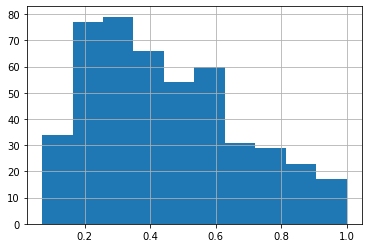

$$$  470   95
total positive  95
tp tn fp fn 0   0   0   0
year  1980 positive  0
actual len  5986
len of xtest  528
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1981
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7853313353313354
(528,)
no of positive  191
len of predy  111


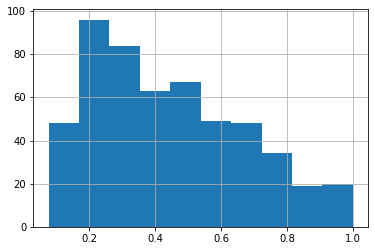

$$$  528   111
total positive  111
tp tn fp fn 0   0   0   0
year  1981 positive  0
actual len  6266
len of xtest  562
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1982
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7853313353313354
(562,)
no of positive  214
len of predy  111


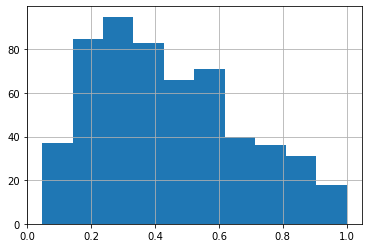

$$$  562   111
total positive  111
tp tn fp fn 0   0   0   0
year  1982 positive  0
actual len  6553
len of xtest  622
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1983
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7853313353313354
(622,)
no of positive  206
len of predy  119


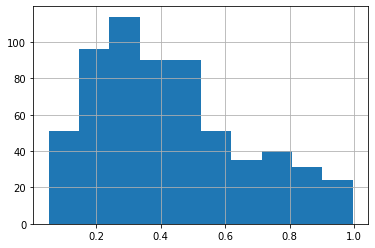

$$$  622   119
total positive  119
tp tn fp fn 0   0   0   0
year  1983 positive  0
actual len  6814
len of xtest  633
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1984
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7853313353313354
(633,)
no of positive  215
len of predy  129


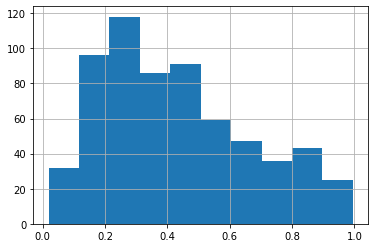

$$$  633   129
total positive  129
tp tn fp fn 0   0   0   0
year  1984 positive  0
actual len  7177
len of xtest  696
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1985
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7853313353313354
(696,)
no of positive  233
len of predy  126


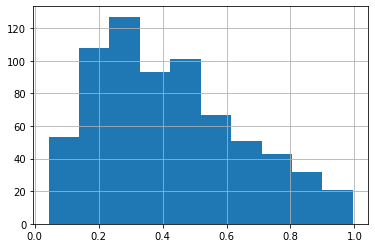

$$$  696   126
total positive  126
tp tn fp fn 0   0   0   0
year  1985 positive  0
actual len  7513
len of xtest  758
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1986
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7853313353313354
(758,)
no of positive  239
len of predy  146


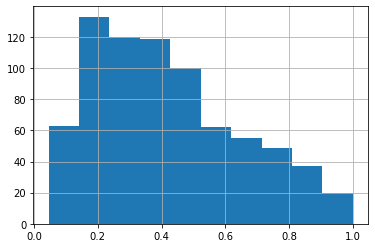

$$$  758   146
total positive  146
tp tn fp fn 0   0   0   0
year  1986 positive  0
actual len  7919
len of xtest  789
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1987
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7853313353313354
(789,)
no of positive  247
len of predy  130


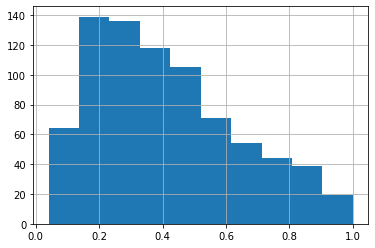

$$$  789   130
total positive  130
tp tn fp fn 0   0   0   0
year  1987 positive  0
actual len  8264
len of xtest  820
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1988
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7853313353313354
(820,)
no of positive  252
len of predy  138


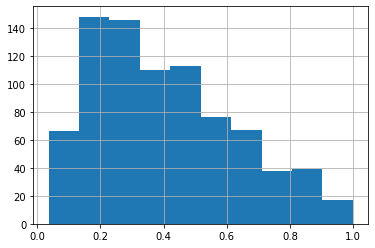

$$$  820   138
total positive  138
tp tn fp fn 0   0   0   0
year  1988 positive  0
actual len  8697
len of xtest  876
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1989
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7853313353313354
(876,)
no of positive  267
len of predy  142


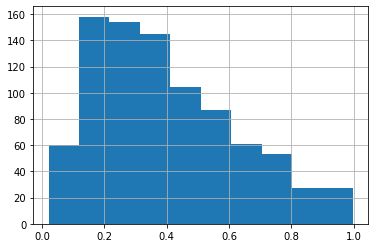

$$$  876   142
total positive  142
tp tn fp fn 0   0   0   0
year  1989 positive  0
actual len  9078
len of xtest  925
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  232
year   1990
[1979 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7566699966699966
(925,)
no of positive  301
len of predy  162


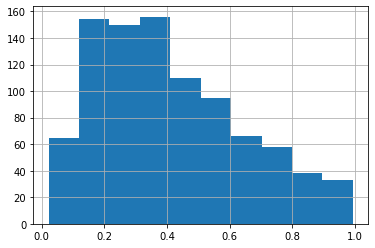

$$$  925   162
total positive  162
tp tn fp fn 1   1   0   0
year  1990 positive  1
actual len  9454
len of xtest  971
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  234
year   1991
[1979 1990 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7628371628371627
(971,)
no of positive  287
len of predy  150


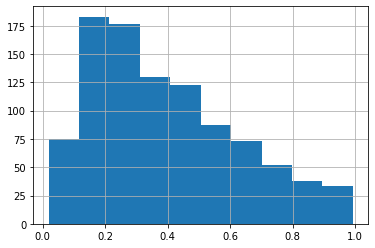

$$$  971   150
total positive  150
tp tn fp fn 0   0   0   0
year  1991 positive  0
actual len  9811
len of xtest  1029
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1992
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7853313353313354
(1029,)
no of positive  321
len of predy  172


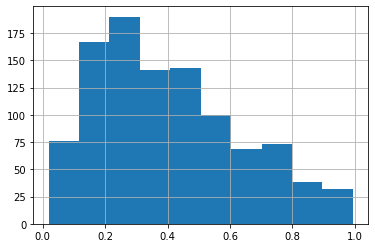

$$$  1029   172
total positive  172
tp tn fp fn 0   0   0   0
year  1992 positive  0
actual len  10147
len of xtest  1102
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  232
year   1993
[1979 1990 1991 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7730902430902431
(1102,)
no of positive  315
len of predy  169


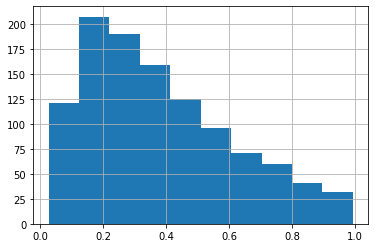

$$$  1102   169
total positive  169
tp tn fp fn 0   0   0   1
year  1993 positive  1
actual len  10562
len of xtest  1182
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  232
year   1994
[1979 1990 1991 1993 1997 1998 1999 2000 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7597569097569099
(1182,)
no of positive  343
len of predy  188


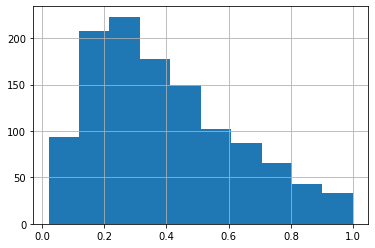

$$$  1182   188
total positive  188
tp tn fp fn 1   1   0   1
year  1994 positive  2
actual len  11060
len of xtest  1302
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1995
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7853313353313354
(1302,)
no of positive  395
len of predy  222


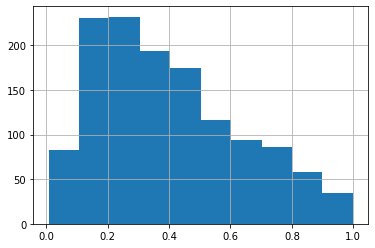

$$$  1302   222
total positive  222
tp tn fp fn 0   0   0   0
year  1995 positive  0
actual len  11465
len of xtest  1393
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   1996
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7853313353313354
(1393,)
no of positive  441
len of predy  250


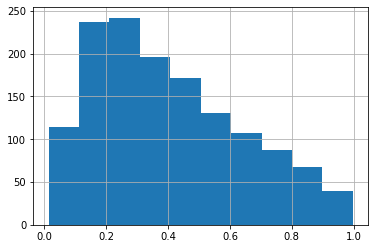

$$$  1393   250
total positive  250
tp tn fp fn 0   0   0   0
year  1996 positive  0
actual len  11872
len of xtest  1495
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  234
year   1997
[1979 1990 1991 1993 1994 1998 1999 2000 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7711704961704962
(1495,)
no of positive  473
len of predy  262


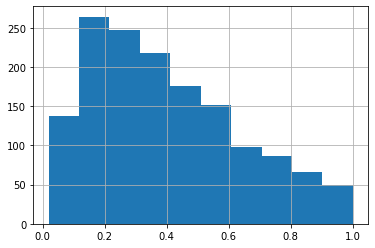

$$$  1495   262
total positive  262
tp tn fp fn 0   0   0   1
year  1997 positive  1
actual len  12265
len of xtest  1595
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  234
year   1998
[1979 1990 1991 1993 1994 1997 1999 2000 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7658674658674658
(1595,)
no of positive  516
len of predy  298


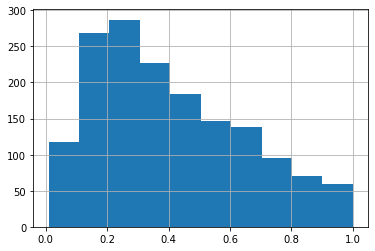

$$$  1595   298
total positive  298
tp tn fp fn 0   0   0   1
year  1998 positive  1
actual len  12697
len of xtest  1663
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  232
year   1999
[1979 1990 1991 1993 1994 1997 1998 2000 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7686396936396936
(1663,)
no of positive  551
len of predy  313


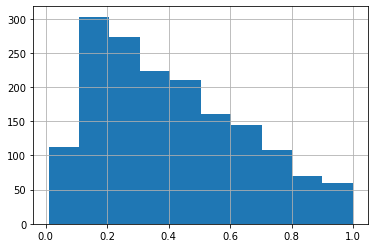

$$$  1663   313
total positive  313
tp tn fp fn 1   1   0   1
year  1999 positive  2
actual len  13164
len of xtest  1716
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  232
year   2000
[1979 1990 1991 1993 1994 1997 1998 1999 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7708619158619159
(1716,)
no of positive  582
len of predy  322


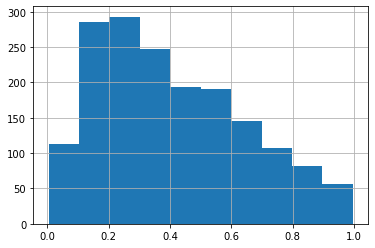

$$$  1716   322
total positive  322
tp tn fp fn 1   1   0   1
year  2000 positive  2
actual len  13742
len of xtest  1797
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   2001
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7853313353313354
(1797,)
no of positive  609
len of predy  352


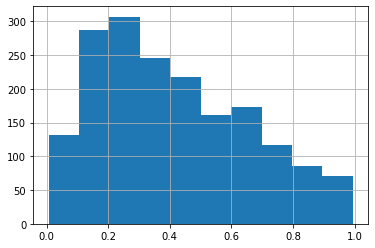

$$$  1797   352
total positive  352
tp tn fp fn 0   0   0   0
year  2001 positive  0
actual len  14273
len of xtest  1798
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   2002
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7853313353313354
(1798,)
no of positive  621
len of predy  339


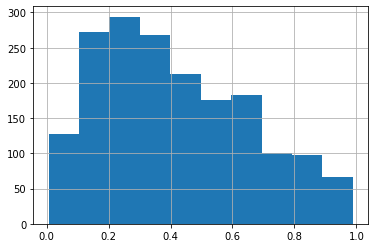

$$$  1798   339
total positive  339
tp tn fp fn 0   0   0   0
year  2002 positive  0
actual len  14913
len of xtest  1842
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   2003
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7853313353313354
(1842,)
no of positive  624
len of predy  370


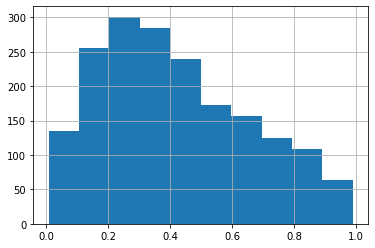

$$$  1842   370
total positive  370
tp tn fp fn 0   0   0   0
year  2003 positive  0
actual len  15526
len of xtest  1891
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   2004
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7853313353313354
(1891,)
no of positive  640
len of predy  381


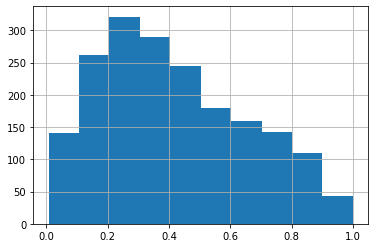

$$$  1891   381
total positive  381
tp tn fp fn 0   0   0   0
year  2004 positive  0
actual len  16147
len of xtest  1936
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   2005
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7853313353313354
(1936,)
no of positive  671
len of predy  407


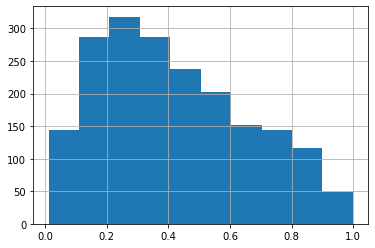

$$$  1936   407
total positive  407
tp tn fp fn 0   0   0   0
year  2005 positive  0
actual len  16741
len of xtest  1978
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  232
year   2006
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7783799533799534
(1978,)
no of positive  705
len of predy  411


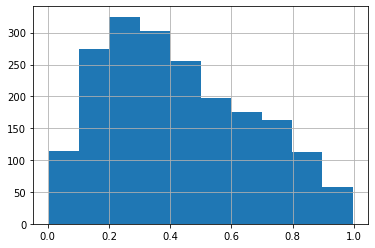

$$$  1978   411
total positive  411
tp tn fp fn 2   0   1   0
year  2006 positive  2
actual len  17387
len of xtest  2023
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  224
year   2007
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7690598290598291
(2023,)
no of positive  723
len of predy  410


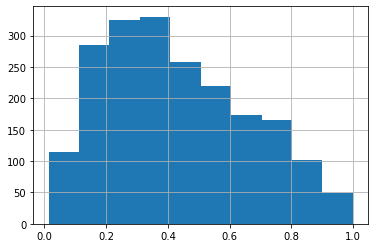

$$$  2023   410
total positive  410
tp tn fp fn 3   0   0   1
year  2007 positive  4
actual len  17998
len of xtest  2035
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  234
year   2008
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7778371628371628
(2035,)
no of positive  681
len of predy  371


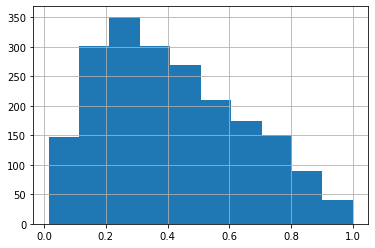

$$$  2035   371
total positive  371
tp tn fp fn 1   0   0   0
year  2008 positive  1
actual len  18746
len of xtest  2105
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  220
year   2009
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7677256077256078
(2105,)
no of positive  714
len of predy  375


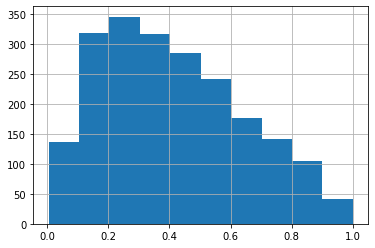

$$$  2105   375
total positive  375
tp tn fp fn 6   2   1   1
year  2009 positive  7
actual len  19487
len of xtest  2161
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  216
year   2010
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7431349206349206
(2161,)
no of positive  723
len of predy  381


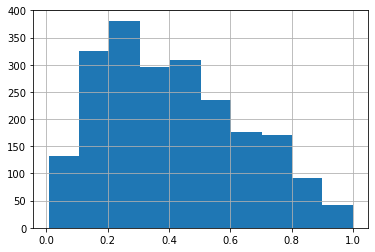

$$$  2161   381
total positive  381
tp tn fp fn 8   6   1   0
year  2010 positive  8
actual len  20289
len of xtest  2212
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  203
year   2011
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7623737373737374
(2212,)
no of positive  785
len of predy  420


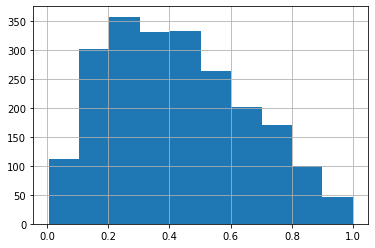

$$$  2212   420
total positive  420
tp tn fp fn 13   8   2   2
year  2011 positive  15
actual len  21155
len of xtest  2276
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  215
year   2012
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7702738927738928
(2276,)
no of positive  843
len of predy  471


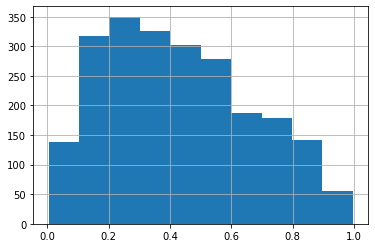

$$$  2276   471
total positive  471
tp tn fp fn 6   1   4   4
year  2012 positive  10
actual len  22085
len of xtest  2351
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  218
year   2013
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2014 2015 2016 2017 2018 2019]
cv score  0.7708649683649683
(2351,)
no of positive  923
len of predy  523


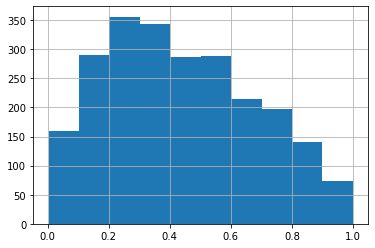

$$$  2351   523
total positive  523
tp tn fp fn 7   3   1   1
year  2013 positive  8
actual len  23101
len of xtest  2451
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  213
year   2014
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2015 2016 2017 2018 2019]
cv score  0.7699580974580975
(2451,)
no of positive  896
len of predy  479


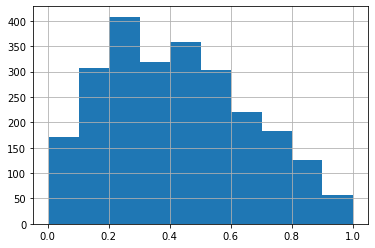

$$$  2451   479
total positive  479
tp tn fp fn 7   5   1   4
year  2014 positive  11
actual len  24194
len of xtest  2564
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  223
year   2015
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2016 2017 2018 2019]
cv score  0.791951936951937
(2564,)
no of positive  942
len of predy  510


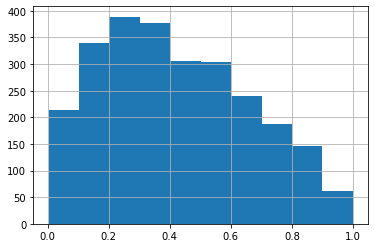

$$$  2564   510
total positive  510
tp tn fp fn 3   1   0   2
year  2015 positive  5
actual len  25290
len of xtest  2640
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  222
year   2016
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2017 2018 2019]
cv score  0.7776862026862028
(2640,)
no of positive  954
len of predy  542


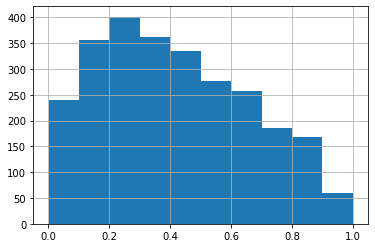

$$$  2640   542
total positive  542
tp tn fp fn 4   3   2   3
year  2016 positive  7
actual len  26499
len of xtest  2728
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  226
year   2017
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2018 2019]
cv score  0.7813125763125763
(2728,)
no of positive  992
len of predy  521


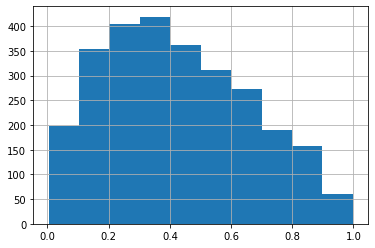

$$$  2728   521
total positive  521
tp tn fp fn 5   0   1   0
year  2017 positive  5
actual len  27875
len of xtest  2832
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  222
year   2018
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2019]
cv score  0.7749317349317348
(2832,)
no of positive  904
len of predy  465


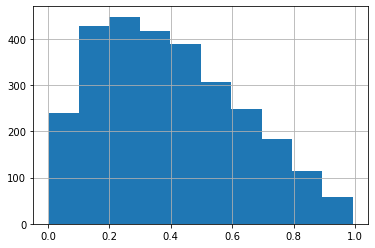

$$$  2832   465
total positive  465
tp tn fp fn 3   2   0   3
year  2018 positive  6
actual len  29230
len of xtest  2977
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  228
year   2019
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018]
cv score  0.7860289710289711
(2977,)
no of positive  988
len of predy  515


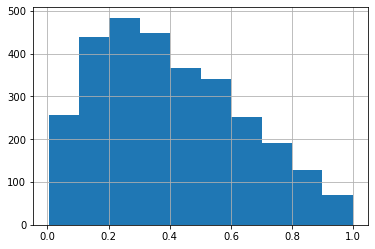

$$$  2977   515
total positive  515
tp tn fp fn 0   3   0   2
year  2019 positive  2
actual len  30564
len of xtest  3106
pct_is_new                   float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
rage                         float64
dtype: object
hdhdhd before  239
len of xtrain  236
year   2020
[1979 1990 1991 1993 1994 1997 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7853313353313354
(3106,)
no of positive  1048
len of predy  554


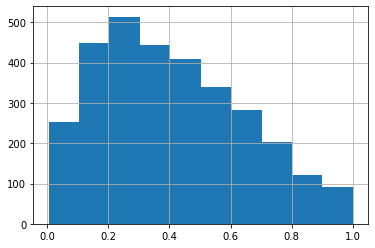

$$$  3106   554
total positive  554
tp tn fp fn 0   0   0   0
year  2020 positive  0
total pos  101  true pos  72  total false pos  294.51162790697674


In [3]:
##logistic regression
def recall2(pred,th, yr):
    data = pd.read_csv("data_84.csv")
    data = data[data['year'] == yr]
    data = data[data['n'] > 100]
    ll = 350
    tot = 0
    ress = pd.merge(data,pred,on='cluster', how = 'inner')
    
    tp,tn,fp, fn = 0,0,0,0
    pred = pred.sort_values(by=['pred_log'], ascending = False)
    res = pred.head(ll)
    for ind in res.index:
        cl = res['cluster'][ind]
        dd = data[data['cluster'] == cl]
        if len(dd) != 0:
            dd = dd.to_numpy()
            cls = dd[0][dd.shape[1] - 1]
            if cls == 1:
                tp += 1
            else:
                fp += 1
        else:
            fp += 1
       
    pred = pred[pred['pred_log'] >= th]
    print("total positive ", ll)
    print("tp fp",tp," ",fp)
    total_pos = len(ress[ress['class'] == 1])
    print("year ",yr,"positive ",total_pos)
    
    
    return total_pos,tp,ll - tp

def recall(pred,th, yr):
    data = pd.read_csv("data_84.csv")
    data = data[data['year'] == yr]
    data = data[data['n'] > 100]

    tot = 0
    res = pd.merge(data,pred,on='cluster', how = 'inner')
    tp,tn,fp, fn = 0,0,0,0
    for ind in res.index:
        if res['class'][ind] == 1 and res['pred_log'][ind] >= th:
            tp += 1
        elif res['class'][ind] == 0 and res['pred_log'][ind] < th:
            tn += 1
        elif res['class'][ind] == 0 and res['pred_log'][ind] >= th:
            fp += 1
        elif res['class'][ind] == 1 and res['pred_log'][ind] < th:
            fn += 1
    pred = pred[pred['pred_log'] >= th]
    print("total positive ", len(pred))
    print("tp tn fp fn",tp," ",tn," ",fp," ",fn)
    total_pos = len(res[res['class'] == 1])
    print("year ",yr,"positive ",total_pos)
    
    
    return total_pos,tp,len(pred[pred['pred_log'] >= th]) - tp


def train(x_train):
    
    
  
    y_train = x_train['class']
    
    '''x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc','pct_of_secbiggest_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish','n_secbiggest_anc'
                            ], axis = 1)'''
    
    x_train[['wrcr','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc']] = minmax_scale(x_train[['wrcr','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc']])
    x_train = x_train.drop(['cluster','year','n','pct_is_newish','pct_dusted_ccn','pct_dusted_rmcl','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)#$%
    x_train = x_train.drop(['n_biggest_anc','nih','n_clusts_90_anc','pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low','class'], axis = 1)

    
    '''x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                           ], axis = 1)
    
    x_train[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_train[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])'''
    
    
    
    '''x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
    x_train = x_train.drop(['cluster','year','n','pct_is_newish','pct_dusted_ccn','pct_dusted_rmcl','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)#$%
    #x_train = x_train.drop(['pct_of_biggest_anc_new','pct_of_secbiggest_anc_new','animal','pct_is_newish'], axis = 1)
    x_train = x_train.drop(['pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low','class'], axis = 1)
    '''
    
    y_train = np.array(y_train)
 
    model = LogisticRegression(random_state=0, C = 10).fit(x_train,y_train) ##logistioc
    
    '''crossvalidation2(x_train, y_train)
    print(model.intercept_, model.coef_, model.score(x_train, y_train))'''
    scores = cross_val_score(model, x_train, y_train, cv=20,scoring = "f1")
    print("cv score ", scores.mean())
    return model
    
tot,tp,total_fp = 0,0,0
yr = 1978

while yr <= 2020:
    
    x_train = pd.read_csv("data_84.csv")
    x_test = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_dccites/features_prediction_"+str(yr)+".csv")
    print("actual len ",len(x_test))
    x_test = x_test.dropna(axis=0)
    
    x_test = x_test[x_test['n'] > 100]
    
   
    #x_test = x_test[x_test['n_biggest_anc'] >= 500]
    x_test = x_test[x_test['rcr_hi'] >= 2.00]
    x_test = x_test[x_test['cited_by_clin'] >= 0.050]
    x_test = x_test[x_test['is_clinical'] >= 0.010] ##this one
    x_test = x_test[x_test['animal'] >= 0.01]

    #x_test = x_test[x_test['molecular_cellular'] >= 0.030] ##this one, with C = 1
    #x_test = x_test[x_test['nih'] >= 0.025]
    #x_test = x_test[x_test['human'] >= 0.25]
    #x_test = x_test[x_test['rage'] >= 5]
    #x_test = x_test[x_test['pct_is_new'] >= 0.09]
    print("len of xtest ",len(x_test))
       
    copy_test = x_test.copy()
    #print(x_test.tail(10))
    
    #x_test = x_test[x_test['is_research_article'] > 0.75]
    
    '''x_test = x_test.drop(['prediction','cluster','year','n',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc','pct_of_secbiggest_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish','n_secbiggest_anc'
                            ], axis = 1)'''
    
    x_test[['wrcr','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc']] = minmax_scale(x_test[['wrcr','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc']])
    x_test = x_test.drop(['cluster','year','n','pct_is_newish','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)#$%
    x_test = x_test.drop(['n_biggest_anc','nih','n_clusts_90_anc','pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low','prediction'], axis = 1)

    
    '''x_test = x_test.drop(['prediction','cluster','year','n',
                               'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                               'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                               ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                               ], axis = 1)
    
    x_test[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_test[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])'''
    
    print(x_test.dtypes)
    '''x_test[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_test[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
    x_test = x_test.drop(['cluster','year','n','pct_is_newish','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)
    x_test = x_test.drop(['prediction','pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low'], axis=1)
    '''
    
    
    print("hdhdhd before ",len(x_train))
    x_train = x_train[x_train['year'] != yr]
    x_train = x_train[x_train['n'] > 100]

    
    #x_train = x_train[x_train['is_research_article'] > 0.75]
    print('len of xtrain ', len(x_train))
    print("year  ",yr)
    print(x_train['year'].unique())

    model = train(x_train)
    
    pred = model.predict(x_test)
    print(pred.shape)
    #print(np.sum(pred))
    print("no of positive ",np.count_nonzero(pred == 1))
    

    
    predy = model.predict_proba(x_test)
    pred_test = []
    for i in range(predy.shape[0]):
        if predy[i][0] >= predy[i][1]:
            #pred_test.append(0.00)
            pred_test.append(predy[i][1])
        else:
            pred_test.append(predy[i][1])
    
    predy = pd.DataFrame(predy, columns = ['col_0','col_1'])
    predy = predy[predy['col_1'] >= 0.65]
    #print("len of df ", len(df))
    print("len of predy ", len(predy))
    
    
    
    copy_test['pred_log'] = pred_test
    copy_test['pred_log'].hist()
    plt.show()
    
    
    print("$$$ ",len(copy_test)," ",len(copy_test[copy_test['pred_log'] >= 0.65]))
    a, b,c = recall(copy_test,0.65, yr)
    tot += a
    tp += b
    total_fp += c
    yr += 1
print("total pos ",tot," true pos ", tp," total false pos ",total_fp/43)